In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
states = pd.read_csv("covid19/4.18states.csv")
abridged_counties = pd.read_csv("covid19/abridged_couties.csv")
us_confirmed = pd.read_csv("covid19/time_series_covid19_confirmed_US.csv")
us_deaths = pd.read_csv("covid19/time_series_covid19_deaths_US.csv")

In [134]:
abridged_counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [135]:
abridged_counties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [136]:
states.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [137]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


In [138]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,2,3


In [139]:
socio_counties = abridged_counties[['CountyName', 'StateName', 'State',
        'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'SVIPercentile', 'HPSAShortage', 
        'HPSAServedPop', 'HPSAUnderservedPop', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017']]

<BarContainer object of 52 artists>

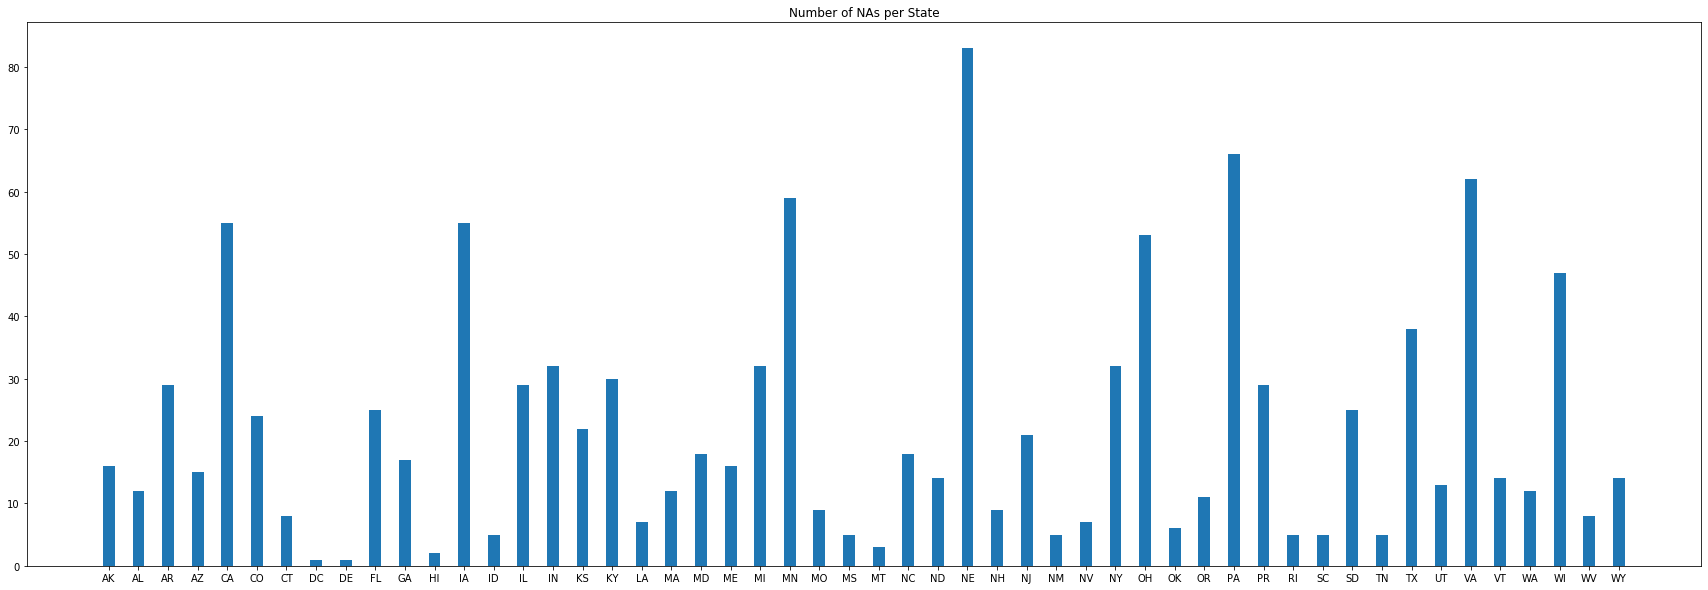

In [140]:
plt.figure(figsize=(30,10))
plt.title('Number of NAs per State')
county_nas = socio_counties[socio_counties['HPSAShortage'].isna()].groupby('StateName').count().reset_index()
plt.bar(county_nas['StateName'], county_nas['CountyName'], .4)

In [141]:
socio_counties.loc[:, 'HPSAShortage'] = socio_counties.loc[:, 'HPSAShortage'].fillna(socio_counties.groupby('StateName')['HPSAShortage'].transform('mean'))
socio_counties.loc[:, 'HPSAServedPop'] = socio_counties.loc[:, 'HPSAServedPop'].fillna(socio_counties.groupby('StateName')['HPSAServedPop'].transform('mean'))
socio_counties.loc[:, 'HPSAUnderservedPop'] = socio_counties.loc[:, 'HPSAUnderservedPop'].fillna(socio_counties.groupby('StateName')['HPSAUnderservedPop'].transform('mean'))

/Users/divineechidume/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [142]:
socio_counties.columns[3:]

Index(['lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'SVIPercentile',
       'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop',
       '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017'],
      dtype='object')

In [143]:
for i in socio_counties.columns[7:]:
    print(i)
    socio_counties.loc[:, i] = socio_counties[i].fillna(socio_counties.groupby('StateName')[i].transform('mean'))
    

SVIPercentile
HPSAShortage
HPSAServedPop
HPSAUnderservedPop
#EligibleforMedicare2018
MedicareEnrollment,AgedTot2017


In [144]:
socio_counties['SVIPercentile'].dtype

dtype('float64')

In [146]:
socio_counties[socio_counties['StateName'] == 'AZ']
"""Notice that even after filtering some states have null values becasue none of the role entries for that state has non null values"""

,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017"
94,Apache,AZ,Arizona,35.405095,-109.491146,35.577687,-109.414840,0.9885,NaN,NaN,NaN,13190.0,10062.0
95,Cochise,AZ,Arizona,31.886312,-109.762949,31.607357,-110.063053,0.9064,NaN,NaN,NaN,33579.0,26316.0
96,Coconino,AZ,Arizona,35.833924,-111.768250,35.514426,-111.590056,0.7131,NaN,NaN,NaN,21712.0,16184.0
97,Gila,AZ,Arizona,33.799571,-110.813308,33.823560,-111.007494,0.8990,NaN,NaN,NaN,17719.0,13861.0
98,Graham,AZ,Arizona,32.934415,-109.899018,32.867330,-109.812181,0.9640,NaN,NaN,NaN,5929.0,4583.0
99,Greenlee,AZ,Arizona,33.208861,-109.246621,32.970402,-109.248712,0.6188,NaN,NaN,NaN,1379.0,1048.0
100,La Paz,AZ,Arizona,33.729753,-113.986154,33.908361,-114.172146,0.9236,NaN,NaN,NaN,6161.0,4771.0
101,Maricopa,AZ,Arizona,33.352637,-112.489139,33.493403,-112.041430,0.6354,NaN,NaN,NaN,706340.0,570367.0
102,Mohave,AZ,Arizona,35.706477,-113.753023,35.069679,-114.249634,0.8624,NaN,NaN,NaN,69569.0,53330.0
103,Navajo,AZ,Arizona,35.392766,-110.322763,34.893625,-110.211155,0.9955,NaN,NaN,NaN,25035.0,18750.0


In [129]:
socio_counties.groupby('StateName').mean()['HPSAShortage']

StateName
AK     3.538187
AL     4.394415
AR     1.138780
AS    17.340000
AZ          NaN
CA     2.655000
CO     1.893932
CT          NaN
DC          NaN
DE    19.725000
FL    11.893721
GA     3.529121
GU    16.490000
HI    20.933333
IA     1.396575
ID     1.981400
IL     2.791666
IN     2.193408
KS     1.537093
KY     1.661048
LA     3.033321
MA     3.345000
MD     4.228333
ME          NaN
MI     3.316080
MN     1.709382
MO     3.964365
MP     6.698000
MS     3.697614
MT     1.603137
NC     3.491978
ND     0.850128
NE     0.383000
NH     2.260000
NJ          NaN
NM     7.487857
NV     5.851950
NY     6.933987
OH     2.690720
OK     2.209761
OR     4.365744
PA     3.690000
PR    43.784082
RI          NaN
SC     5.555068
SD     0.829812
TN     2.543769
TX     2.832049
UT     3.197250
VA     2.546214
VI     4.886667
VT          NaN
WA    10.793333
WI     2.272184
WV     2.321987
WY     0.565556
Name: HPSAShortage, dtype: float64

In [114]:
socio_counties['SVIPercentile'].value_counts()

0.593900    1
0.338900    1
0.468200    1
0.930600    1
0.982200    1
           ..
0.733800    2
0.989500    2
0.480600    2
0.561897    3
0.429317    3
Name: SVIPercentile, Length: 3078, dtype: int64